In [1]:
# image_path = '/Users/hungnguyen/Developer/repos/tensorflow/Final/MC_OCR/mc_ocr/data/mc_ocr_train_filtered/mcocr_public_145013aukcu.jpg'
image_path = '/Users/hungnguyen/Developer/repos/tensorflow/Final/MC_OCR/mc_ocr/data/mc_ocr_train_filtered/mcocr_public_145014apodg.jpg'

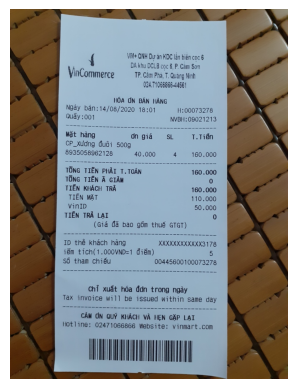

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# ROTATION IMAGE BY TESSERACT

Tesseract OSD Output:
 Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.63
Script: Latin
Script confidence: 1.67

Detected Angle: 0, Confidence: 0.63
Image is at the correct orientation (no rotation needed).


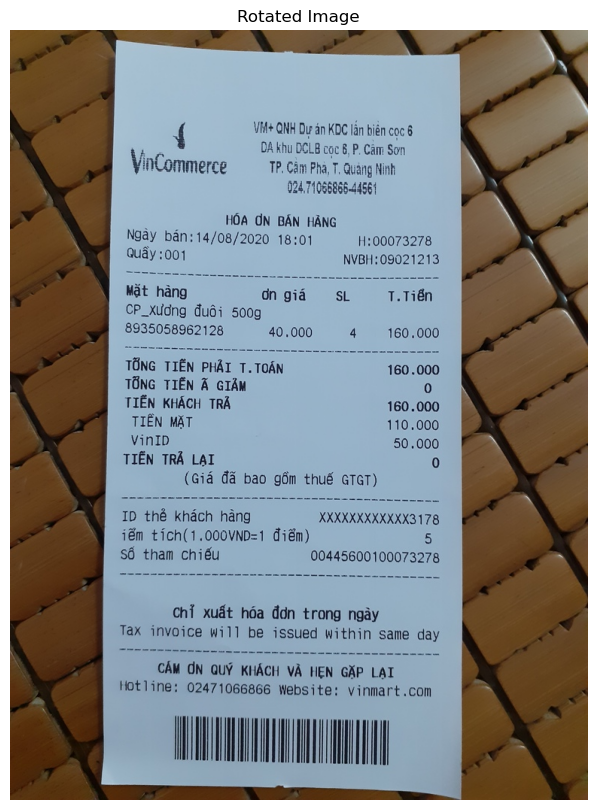

Image path ./rotated_image/mcocr_public_145014apodg.jpg appended to ./json_for_result.json


In [3]:
# ROTATION IMAGE BY TESSERACT
import os
from PIL import Image
import pytesseract
import cv2
import re
import numpy as np
import json
import matplotlib.pyplot as plt

def detect_orientation_with_tesseract(image_path):
    osd_result = pytesseract.image_to_osd(image_path, config='--psm 0 -c min_characters_to_try=5')
    print("Tesseract OSD Output:\n", osd_result)
    
    # Extract angle and confidence from OSD result
    angle = re.search(r'Orientation in degrees: \d+', osd_result).group().split(':')[-1].strip()
    confidence = re.search(r'Orientation confidence: \d+\.\d+', osd_result).group().split(':')[-1].strip()
    confidence = float(confidence)

    print(f"Detected Angle: {angle}, Confidence: {confidence}")
    return angle, confidence

# def crop_image(image):
#     height, width = image.shape[:2]
#     cropped_image = image[int(height * 0.1):int(height * 0.9), int(width * 0.1):int(width * 0.9)]  
#     return cropped_image

def rotate_image_based_on_angle(image, angle, confidence):
    image_np = np.array(image)
    angle = int(angle)  # Convert angle to integer for comparison

    # If confidence is above a lower threshold (e.g., 0.5), or remove confidence check
    if angle == 90:
        rotated_image = cv2.rotate(image_np, cv2.ROTATE_90_COUNTERCLOCKWISE)
        print("Image rotated 90 degrees counterclockwise.")
    elif angle == 180:
        rotated_image = cv2.rotate(image_np, cv2.ROTATE_180)
        print("Image rotated 180 degrees.")
    elif angle == 270:
        rotated_image = cv2.rotate(image_np, cv2.ROTATE_90_CLOCKWISE)
        print("Image rotated 90 degrees clockwise.")
    else:
        rotated_image = image_np
        print("Image is at the correct orientation (no rotation needed).")

    return rotated_image

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    img_name = image_path.split('/')[-1]
    # cropped_image = crop_image(image)

    # Detect orientation using Tesseract OSD
    angle, confidence = detect_orientation_with_tesseract(image)

    # Rotate image based on detected angle and confidence
    rotated_image = rotate_image_based_on_angle(image, angle, confidence)

    return rotated_image

def visualize_image(image, title="Image"):
    """Display image using matplotlib."""
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()


rotated_image = preprocess_image(image_path)
# Save the rotated image
rotated_image_path = os.path.join('./rotated_image', os.path.basename(image_path))
cv2.imwrite(rotated_image_path, rotated_image)

# Update the image_path variable
image_path = rotated_image_path
visualize_image(rotated_image, title="Rotated Image")

# Append image path to JSON file
json_file_path = './json_for_result.json'
data = {}

# Read existing data from the JSON file if it exists
if os.path.exists(json_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

# if json exist, remove all data in it
data.clear()

# Append the new image path
if 'image_path' not in data:
    data['image_path'] = []
data['image_path'].append(image_path)

# Write the updated data back to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print(f"Image path {image_path} appended to {json_file_path}")

# TEXT DETECTION USING PADDLE OCR

[2024/12/30 22:19:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/hungnguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/hungnguyen/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_nu

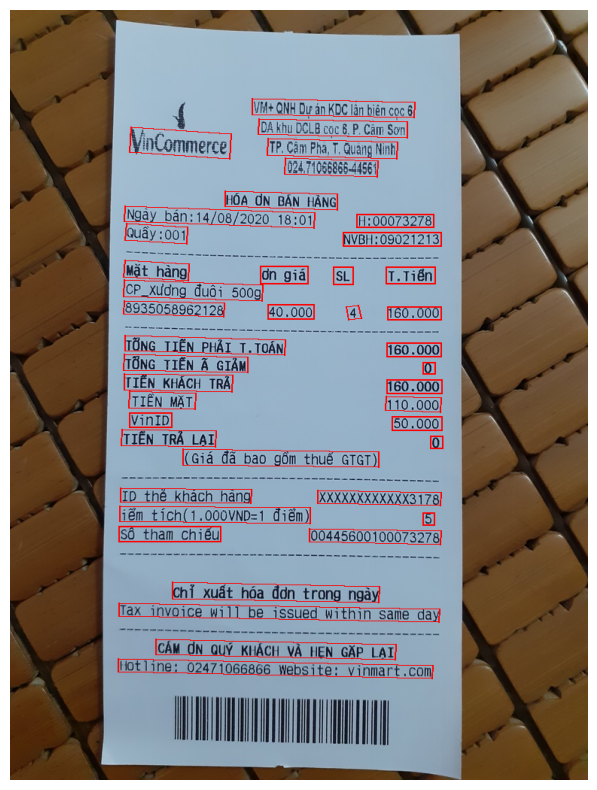

[[(322, 117), (537, 122), (536, 143), (322, 139), (322, 117)], [(331, 144), (527, 148), (527, 170), (330, 165), (331, 144)], [(161, 155), (293, 164), (291, 198), (159, 189), (161, 155)], [(343, 170), (514, 175), (513, 198), (342, 193), (343, 170)], [(366, 196), (488, 200), (487, 222), (365, 218), (366, 196)], [(286, 240), (434, 244), (434, 266), (286, 261), (286, 240)], [(153, 260), (404, 269), (403, 290), (152, 281), (153, 260)], [(461, 271), (562, 271), (562, 289), (461, 289), (461, 271)], [(155, 283), (235, 288), (234, 311), (153, 306), (155, 283)], [(443, 295), (572, 295), (572, 314), (443, 314), (443, 295)], [(153, 332), (237, 337), (236, 360), (151, 355), (153, 332)], [(333, 340), (395, 340), (395, 364), (333, 364), (333, 340)], [(430, 341), (455, 341), (455, 365), (430, 365), (430, 341)], [(500, 341), (564, 341), (564, 364), (500, 364), (500, 341)], [(152, 358), (335, 365), (334, 387), (151, 381), (152, 358)], [(152, 386), (284, 389), (283, 408), (151, 404), (152, 386)], [(343, 

In [4]:
# pip install paddleocr
# pip install paddlepaddle

# TEXT DETECTION USING PADDLE OCR
from paddleocr import PaddleOCR
import os
from PIL import Image, ImageDraw

def text_detection(rotated_image, lang='vi'):
    # Initialize the OCR model
    ocr = PaddleOCR(use_angle_cls=True, lang=lang)
    
    # Perform OCR on the image
    result = ocr.ocr(rotated_image, cls=True)
    
    # List to store bounding boxes
    bboxes = []
    
    # Loop through OCR results and extract bounding boxes
    for line in result[0]:
        bbox = line[0]
        bbox = [(int(coord[0]), int(coord[1])) for coord in bbox]
        bbox.append(bbox[0])  # Close the polygon by repeating the first point
        bboxes.append(bbox)  # Store the bounding box

    # Convert the rotated image to RGB (OpenCV uses BGR, PIL uses RGB)
    image_with_boxes = Image.fromarray(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    
    # Draw the bounding boxes on the image
    draw = ImageDraw.Draw(image_with_boxes)
    
    for bbox in bboxes:
        draw.line(bbox, fill="red", width=2)
    
    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    return bboxes

bbox = text_detection(rotated_image)
print(bbox)

# Update bounding boxes in JSON file
data['bboxes'] = bbox

# Write the updated data back to the JSON file
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, indent=4, ensure_ascii=False)

print(f"Bounding boxes updated in {json_file_path}")


# RECOGNITION TEXT USING VIETOCR 

In [5]:
# RECOGNITION TEXT USING VIETOCR 
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_seq2seq')

# config['weights'] = 'weights/transformerocr.pth'
config['cnn']['pretrained'] = False
config['device'] = 'cpu'
detector = Predictor(config)

# CROP TEXT BY BOUNDING BOXES
crop_image_folder = './crop_image_text'

# if folder not exist, create it
if not os.path.exists(crop_image_folder):
    os.makedirs(crop_image_folder)
#if folder exist, remove all files in folder
else:
    files = os.listdir(crop_image_folder)
    for file in files:
        os.remove(os.path.join(crop_image_folder, file))

cropped_images = []
recognized_texts = []
def crop_text_by_bboxes(rotated_image, bboxes):
  image_name = os.path.basename(image_path)

  for i, bbox in enumerate(bboxes):
    # Extract the coordinates from the bounding box
    x_min = min([point[0] for point in bbox])
    y_min = min([point[1] for point in bbox])
    x_max = max([point[0] for point in bbox])
    y_max = max([point[1] for point in bbox])
    
    # Crop the image using the bounding box coordinates
    cropped_image = rotated_image[y_min:y_max, x_min:x_max]
    cropped_images.append(cropped_image)
    
    # Save the cropped image
    cropped_image_pil = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    text = detector.predict(cropped_image_pil)
    recognized_texts.append(text)
    cropped_image_pil.save(f"{crop_image_folder}/{image_name}_cropped_{i}.png")

  return cropped_images

cropped_images = crop_text_by_bboxes(rotated_image, bbox)

# Update recognized texts in JSON file
if 'words' not in data:
    data['words'] = []

data['words'].extend(recognized_texts)

# Write the updated data back to the JSON file
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

print(f"Recognized texts updated in {json_file_path}")


Model weight /var/folders/pm/vdvchn5d3psc1n3ny2r3hpwr0000gn/T/vgg_seq2seq.pth exsits. Ignore download!
Recognized texts updated in ./json_for_result.json


# KEY INFORMATION EXTRACTION USING LAYOUTLM

In [6]:
from transformers import LayoutLMForTokenClassification, LayoutLMv2Processor
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Load LayoutLM model and processor from Huggingface Hub
model = LayoutLMForTokenClassification.from_pretrained("HungNguyen142/layoutlm-mcocr")
processor = LayoutLMv2Processor.from_pretrained("HungNguyen142/layoutlm-mcocr")

final_json = './result_with_threshold.json'

In [7]:
import json
import torch
from PIL import Image
import torch.nn.functional as F
import cv2

# Normalize box function for LayoutLM
def unnormalize_box(bbox, width, height):
    return [
        width * (bbox[0] / 1000),
        height * (bbox[1] / 1000),
        width * (bbox[2] / 1000),
        height * (bbox[3] / 1000),
    ]

# Color mapping for different labels
label2color = {
    "SELLER": "blue",
    "ADDRESS": "red",
    "TIMESTAMP": "green",
    "TOTAL_COST": "pink"
}

# Run inference on cropped image
def run_inference_on_cropped_image(cropped_image, threshold, model=model, processor=processor):
    # Convert the cropped image to RGB format
    image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)).convert("RGB")

    # Create model input
    encoding = processor(images=image, return_tensors="pt")
    del encoding["image"]

    # Run inference
    outputs = model(**encoding)

    # Apply softmax to logits to get probabilities
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=-1)

    # Get the labels based on the highest probability
    predictions = probabilities.argmax(-1).squeeze().tolist()
    labels = [model.config.id2label[prediction] for prediction in predictions]

    # Get probabilities for the predicted labels
    predicted_probabilities = probabilities.max(-1).values.squeeze().tolist()

    # Get the highest predicted probability
    highest_probability = max(predicted_probabilities)
    if highest_probability < threshold:
        return None
    else : 
        # Get the label with the highest probability
        highest_label = labels[predicted_probabilities.index(highest_probability)]
        filtered_labels = [highest_label]
        return filtered_labels, highest_probability

In [8]:
# Function to find valid total cost: a text and a number

def find_total_cost(valid_words_total_cost, prob_total_cost, valid_bboxes_total_cost, deviation_threshold=50):
    text_candidates = []
    number_candidates = []

    # Separate text and number candidates
    for word, prob, bbox in zip(valid_words_total_cost, prob_total_cost, valid_bboxes_total_cost):
        if any(char.isdigit() for char in word) and ',' in word:  # Number candidates with a comma
            number_candidates.append((word, prob, bbox))
        elif all(not char.isdigit() for char in word):  # Text candidates without digits
            text_candidates.append((word, prob, bbox))

    total_cost_text = None
    total_cost_number = None
    best_match_score = float('inf')
    bbox_text = None
    bbox_number = None

    # Check alignment for Text and Number
    for text, text_prob, text_bbox in text_candidates:
        text_y_center = (text_bbox[0][1] + text_bbox[2][1]) / 2  # Center Y of Text bounding box

        for number, number_prob, number_bbox in number_candidates:
            number_y_center = (number_bbox[0][1] + number_bbox[2][1]) / 2  # Center Y of Number bounding box

            # Compute vertical and horizontal proximity
            y_distance = abs(text_y_center - number_y_center)
            x_distance = abs((text_bbox[0][0] + text_bbox[2][0]) / 2 - (number_bbox[0][0] + number_bbox[2][0]) / 2)

            # Match if proximity satisfies the threshold
            if y_distance <= deviation_threshold or x_distance <= deviation_threshold:
                # Match score based on distance and probabilities
                match_score = y_distance + x_distance - (text_prob + number_prob)
                if match_score < best_match_score:
                    best_match_score = match_score
                    total_cost_text = text
                    total_cost_number = number
                    bbox_text = text_bbox
                    bbox_number = number_bbox

    return total_cost_text, total_cost_number, bbox_text, bbox_number

In [9]:
# Function to process bounding boxes and filter based on NER predictions
def process_json_and_run_inference(json_file_path, threshold):
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    # Load the image (you can handle rotated images here if needed)
    image_path = data['image_path'][0]

    # Open the final result JSON file and write the image path into it
    with open(final_json, 'w') as final_result_file:
        json.dump({"image_path": image_path}, final_result_file, indent=4)
    image = cv2.imread(image_path)

    rotated_image = image  

    # Initialize to store bbox, words, and NER tags for ADDRESS
    valid_bboxes_address = []
    valid_words_address = []
    ner_tags_address = []
    prob_address = []
    # Initialize to store bbox, words, and NER tags for SELLER
    valid_bboxes_seller = []
    valid_words_seller = []
    ner_tags_seller = []
    prob_seller = []
    # Initialize to store bbox, words, and NER tags for TOTAL_COST
    valid_bboxes_total_cost = []
    valid_words_total_cost = []
    ner_tags_total_cost = []
    prob_total_cost = []
    # Initialize to store bbox, words, and NER tags for TIMESTAMP
    valid_bboxes_timestamp = []
    valid_words_timestamp = []
    ner_tags_timestamp = []
    prob_timestamp = []

    label_counts = {
        "ADDRESS": 0,
        "SELLER": 0,
        "TOTAL_COST": 0,
        "TIMESTAMP": 0
    }

    # Iterate through each bounding box and process the corresponding crop
    for i, (bbox, word) in enumerate(zip(data['bboxes'], data['words'])):
        # Extract the coordinates from the bounding box
        x_min = min([point[0] for point in bbox])
        y_min = min([point[1] for point in bbox])
        x_max = max([point[0] for point in bbox])
        y_max = max([point[1] for point in bbox])
        
        # Crop the image using the bounding box coordinates
        cropped_image = rotated_image[y_min:y_max, x_min:x_max]
        
        # Perform inference on the cropped image
        inference_result = run_inference_on_cropped_image(cropped_image, threshold)

        # Proceed only if inference_result is not None
        if inference_result:
            recognized_labels, prob = inference_result

            if recognized_labels:
                for label in recognized_labels:
                    if label == "ADDRESS":
                        valid_bboxes_address.append(bbox)
                        valid_words_address.append(word)
                        ner_tags_address.append(label)
                        prob_address.append(prob)
                        label_counts["ADDRESS"] += 1
                    elif label == "SELLER":
                        valid_bboxes_seller.append(bbox)
                        valid_words_seller.append(word)
                        ner_tags_seller.append(label)
                        prob_seller.append(prob)
                        label_counts["SELLER"] += 1
                    elif label == "TOTAL_COST":
                        valid_bboxes_total_cost.append(bbox)
                        valid_words_total_cost.append(word)
                        ner_tags_total_cost.append(label)
                        prob_total_cost.append(prob)
                        label_counts["TOTAL_COST"] += 1
                    elif label == "TIMESTAMP":
                        valid_bboxes_timestamp.append(bbox)
                        valid_words_timestamp.append(word)
                        ner_tags_timestamp.append(label)
                        prob_timestamp.append(prob)
                        label_counts["TIMESTAMP"] += 1

    # with ADDRESS label, sort bbox, word by prob 
    valid_bboxes_address = [bbox for _, bbox in sorted(zip(prob_address, valid_bboxes_address), reverse=True)]
    valid_words_address = [word for _, word in sorted(zip(prob_address, valid_words_address), reverse=True)]
    # with SELLER label, sort bbox, word by prob
    valid_bboxes_seller = [bbox for _, bbox in sorted(zip(prob_seller, valid_bboxes_seller), reverse=True)]
    valid_words_seller = [word for _, word in sorted(zip(prob_seller, valid_words_seller), reverse=True)]
    # with TOTAL_COST label, sort bbox, word by prob
    valid_bboxes_total_cost = [bbox for _, bbox in sorted(zip(prob_total_cost, valid_bboxes_total_cost), reverse=True)]
    valid_words_total_cost = [word for _, word in sorted(zip(prob_total_cost, valid_words_total_cost), reverse=True)]
    # with TIMESTAMP label, sort bbox, word by prob
    valid_bboxes_timestamp = [bbox for _, bbox in sorted(zip(prob_timestamp, valid_bboxes_timestamp), reverse=True)]
    valid_words_timestamp = [word for _, word in sorted(zip(prob_timestamp, valid_words_timestamp), reverse=True)]

    result_bboxes = []
    result_words = []
    result_ner_tags = []

    seller_word = valid_words_seller[0] if valid_words_seller else None
    seller_bbox = valid_bboxes_seller[0] if valid_bboxes_seller else None
    result_words.append(seller_word)
    result_bboxes.append(seller_bbox)
    result_ner_tags.append("SELLER")

    time_stamp_word = valid_words_timestamp[0] if valid_words_timestamp else None
    time_stamp_bbox = valid_bboxes_timestamp[0] if valid_bboxes_timestamp else None
    result_words.append(time_stamp_word)
    result_bboxes.append(time_stamp_bbox)
    result_ner_tags.append("TIMESTAMP")

    total_cost_text, total_cost_number, bbox_text, bbox_number = find_total_cost(valid_words_total_cost, prob_total_cost, valid_bboxes_total_cost)
    if total_cost_text is not None and total_cost_number is not None:
        result_words.append(total_cost_text)
        result_bboxes.append(bbox_text)
        result_ner_tags.append("TOTAL_COST")
        result_words.append(total_cost_number)
        result_bboxes.append(bbox_number)
        result_ner_tags.append("TOTAL_COST")
    else:
        # Append the highest probability TOTAL_COST candidate
        if valid_words_total_cost:
            result_words.append(valid_words_total_cost[0])
            result_bboxes.append(valid_bboxes_total_cost[0])
            result_ner_tags.append("TOTAL_COST")
        else :
            result_words.append(None)
            result_bboxes.append(None)
            result_ner_tags.append("TOTAL_COST")
        

    # # Print all ADDRESS with their probabilities
    # for word, prob in zip(valid_words_address, prob_address):
    #     print(f"ADDRESS: {word}, Probability: {prob}")

    # Check if address prob > 0.97, append all
    for word, prob, bbox in zip(valid_words_address, prob_address, valid_bboxes_address):
        if prob > 0.97:
            result_words.append(word)
            result_bboxes.append(bbox)
            result_ner_tags.append("ADDRESS")

    print(f"Number of valid bounding boxes for each label: {label_counts}")


    # Write valid bounding boxes, words, and NER tags into the final JSON file
    with open(final_json, 'r+', encoding='utf-8') as final_result_file:
        # Load existing data from the JSON file
        final_data = json.load(final_result_file)
        
        # Keep only the image_path and add new data
        final_data = {
            "image_path": final_data["image_path"],  # Keep the image_path
            "bboxes": result_bboxes,  # Add new bounding boxes
            "words": result_words,  # Add new words
            "ner_tags": result_ner_tags  # Add new NER tags
        }
        
        # Move the file pointer to the beginning of the file before writing
        final_result_file.seek(0)
        
        # Write the updated data to the file
        json.dump(final_data, final_result_file, indent=4, ensure_ascii=False)
        
        # Truncate the file to the current position (in case the new data is shorter than the old data)
        final_result_file.truncate()

In [10]:
process_json_and_run_inference(json_file_path, threshold=0.10)

Number of valid bounding boxes for each label: {'ADDRESS': 5, 'SELLER': 29, 'TOTAL_COST': 7, 'TIMESTAMP': 1}


# VISUALIZE RESULT

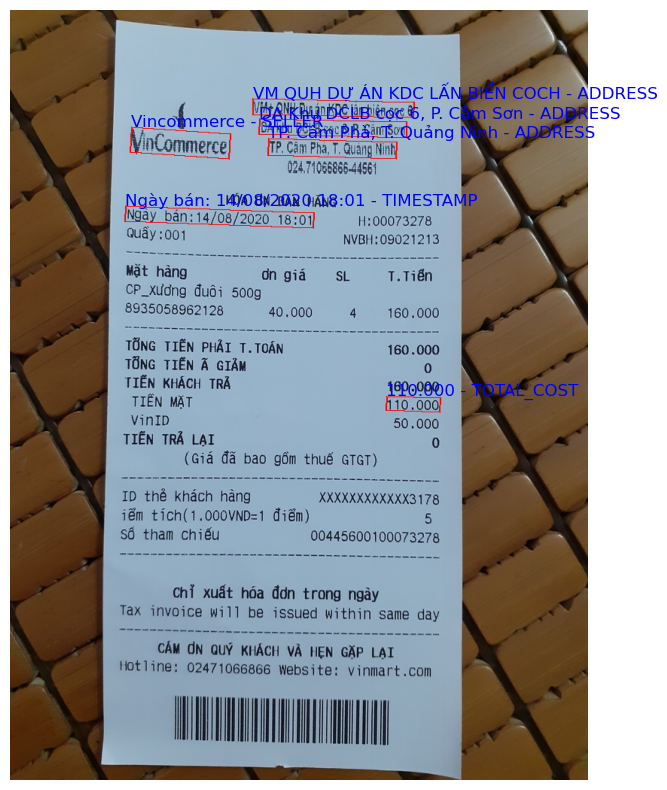

In [11]:
# Read the JSON file
with open(final_json, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Load the image from the path in the JSON
image_path = json_data['image_path']
image = Image.open(image_path)

# Get the bounding boxes from the JSON
bboxes = json_data['bboxes']
words = json_data['words']
ner_tags = json_data['ner_tags']

# Draw bounding boxes and words on the image
draw = ImageDraw.Draw(image)

# Loop through each bounding box and draw it on the image
for bbox in bboxes:
    # Unzip the bbox coordinates (assuming each bbox is a list of [x, y] pairs)
    bbox_x, bbox_y = zip(*bbox)
    draw.polygon(list(zip(bbox_x, bbox_y)), outline='red', width=2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide the axes

for i, word in enumerate(words):
    # Get the first corner of the bounding box for positioning the word
    x, y = bboxes[i][0]
    # Create the text: word - ner_tag
    text_ner_tag = f"{word} - {ner_tags[i]}"
    
    # Annotate the image with the word and NER tag
    plt.text(x, y, text_ner_tag, fontsize=12, color='blue')

plt.show()

## LABEL

In [12]:
# from PIL import Image

# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# data = {
#     "id": "mcocr_public_145013aisfu",
#         "words": [
#             "SCTC CÔ THỎ 104 TRẦN PHÚ - CẨM",
#             "PHẢ",
#             "104 Trần Phú - phường Cẩm Tây - Thành phố Cẩm",
#             "Phả - Quảng Ninh",
#             "Tổng thanh toán",
#             "135.000đ"
#         ],
#         "bboxes": [
#             [
#                 132,
#                 209,
#                 157,
#                 633
#             ],
#             [
#                 160,
#                 392,
#                 191,
#                 445
#             ],
#             [
#                 192,
#                 198,
#                 223,
#                 640
#             ],
#             [
#                 226,
#                 338,
#                 248,
#                 503
#             ],
#             [
#                 736,
#                 448,
#                 772,
#                 650
#             ],
#             [
#                 728,
#                 169,
#                 767,
#                 293
#             ]
#         ],
#         "ner_tags": [
#             0,
#             0,
#             1,
#             1,
#             3,
#             3
#         ],
#         "image_path": "/Users/hungnguyen/Developer/repos/tensorflow/Final/MC_OCR/mc_ocr/data/mc_ocr_train_filtered/mcocr_public_145013aisfu.jpg"
# }

# def visualize_data(data):
#     image_path = data["image_path"]
#     words = data["words"]
#     bboxes = data["bboxes"]

#     # Load image
#     image = Image.open(image_path)
#     fig, ax = plt.subplots(1)
#     ax.imshow(image)

#     # Plot bounding boxes and words
#     for bbox, word in zip(bboxes, words):
#         x, y, w, h = bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]
#         rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)
#         plt.text(x, y, word, fontsize=12, color='blue')

#     plt.show()

# visualize_data(data)